**ЛОГИКА РЕШЕНИЯ:**
1. На входе принимаем количество клиентов,
2. Создаем пустой словарь, в который будем складывать полученные номера групп и количество клиентов в них,
3. Проходимся циклом со стартового значения (0, либо заданный ID) до финального (стартовое значение + количество клиентов),
4. Добавляем значения в словарь. Если полученный номер группы есть в нашем словаре - добавляем к его значению единицу, если нет - создаем пару 'номер группы': 1

*Важно: Можно уменьшить время работы функций на ~7%, если воспользоваться классом Counter*

In [1]:
def count_by_groups_from_zero(n_customers):
    """Calculate the count of clients in each group (Started from 0)."""
    # Simple value check
    if n_customers > 9999999:
        print('Oops!... Please, check your value! It looks like it\'s too many ')
    else:
        result = {}
        last_id = n_customers + 1       # It looks clearer
        # Get group numbers in the loop
        for i in range(last_id):
            group_number =  sum(map(int, str(i)))
            # And here we create or add 1 value to our group counter in result dict
            if group_number in result:
                result[group_number] += 1
            else:
                result[group_number] = 1
        return result

In [2]:
def count_by_groups_from_given_id(n_customers, n_first_id):
    """Calculate the count of clients in each group (Started from given first_id)."""
    if n_customers + n_first_id > 9999999:
        print('Oops!... Please, check your values! It looks like it\'s too many')
    else:
        result = {}
        last_id = n_first_id + n_customers + 1      # It looks clearer
        # Get group numbers in the loop
        for i in range(n_first_id, last_id):
            group_number =  sum(map(int, str(i)))
            # And here we create or add 1 value to our group counter in result dict
            if group_number in result:
                result[group_number] += 1
            else:
                result[group_number] = 1
        return result

**Проверим, что мы получили**

In [3]:
sample_one = count_by_groups_from_zero(7485289)
sample_two = count_by_groups_from_given_id(6485289, 1000000)

Завернем значения получившихся словарей ( == количество клиентов в группе) в серию и посмотрим гистограмму.

In [10]:
import pandas as pd
sample_one_serial = pd.Series(sample_one.values())
sample_two_serial = pd.Series(sample_two.values())

<AxesSubplot:>

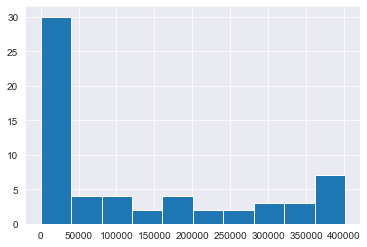

In [11]:
sample_one_serial.hist()

<AxesSubplot:>

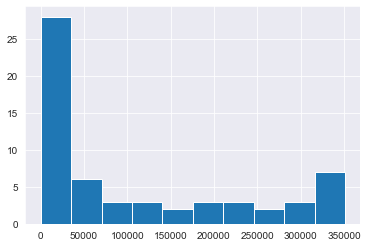

In [12]:
sample_two_serial.hist()

**Выявленные проблемы:**
В первой функии мы получаем группу "0", в которую вошло лишь одно значение.
Также если мы посмотрим гистограммы значений наших словарей, то увидим, что количество клиентов в группе распределенно с большим перекосом к оси Y.

**ВЫВОДЫ:**
Следует пересмотреть способы разделения клиентов на группы, с целью выравнивания количества клиентов в каждой группе.

Спасибо за задание. Было интересно, хоть и маловато :(